In [2]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import os

In [4]:
from src.random_unitary import random_energy_preserving_unitary
import matplotlib.pyplot as plt
import numpy as np
from src import measurements as measure, density_matrix as DM

In [5]:
N = 8
chunks = 2
block_size = N // chunks

In [6]:
b = DM.energy_basis(block_size)
I = DM.Identity(b)

In [7]:
pops = [[.1,.1,.1,.2,.4,.4,.4,.3]]

In [8]:
sys = DM.n_thermal_qbits(pops[0])
sys.change_to_energy_basis()

In [9]:
for i in range(20):
    Unitarys = []
    for chunk_index in range(chunks):
        to_tensor = [I for _ in range(chunks)]
        to_tensor[chunk_index] = random_energy_preserving_unitary(block_size)
        U = to_tensor[0].tensor(*to_tensor[1:])
        Unitarys.append(U)
    for U in Unitarys:
        U.change_to_energy_basis()
        sys = U * sys * U.H
    pops.append(np.real(measure.pops(sys)))

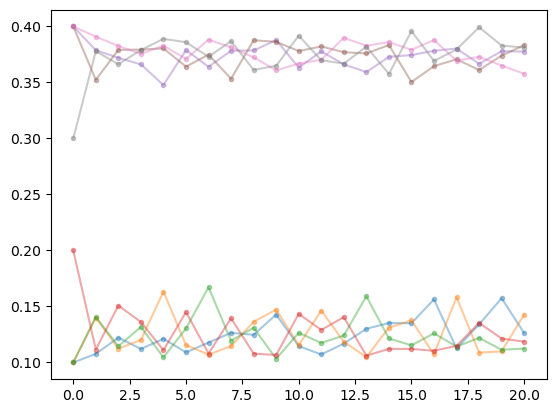

In [10]:
plt.plot(pops,linestyle='-', marker='.',alpha = .4)
plt.show()

Above, we broke our system in to two subsystems, effectivly running two seperate isolated simulations of the two. This happens above becouse we say 2 chunks, dividing the system in half, and then we leave the system order unchanged, so each chunk is the same for every step of the simulation.

In [15]:
pops = [[.1,.1,.1,.2,.4,.4,.4,.3]]
sys = DM.n_thermal_qbits(pops[0])
sys.change_to_energy_basis()

In [16]:
for i in range(20):
    Unitarys = []
    for chunk_index in range(chunks):
        to_tensor = [I for _ in range(chunks)]
        to_tensor[chunk_index] = random_unitary(block_size)
        U = to_tensor[0].tensor(*to_tensor[1:])
        Unitarys.append(U)
        
    #shift the order of the qbits 
    order = list(range(N))
    shift = np.random.randint(len(order))
    order = np.roll(order, shift)
    U.relabel_basis(order)
    for U in Unitarys:
        U.change_to_energy_basis()
        sys = U * sys * U.H
    pops.append(np.real(measure.pops(sys)))

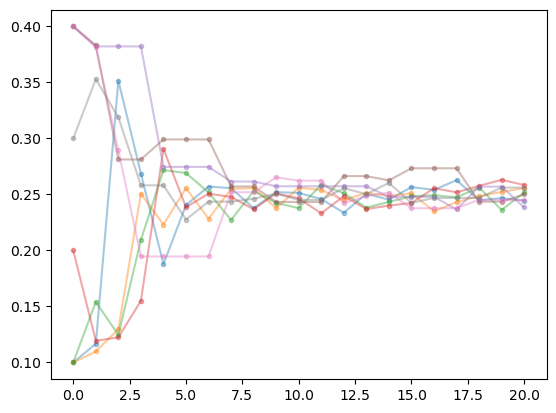

In [17]:
plt.plot(pops,linestyle='-', marker='.',alpha = .4)
plt.show()

By shifting the order of the qbits each iteration the subsystems can exchange information and mix, coming to a joint thermalization.

In [15]:
pops = [.1,.1,.1,.1,.14,.1,.1,.1]

sys = DM.n_thermal_qbits(pops)
sys.change_to_energy_basis()
temps = [measure.temps(sys)]

In [16]:
for i in range(20):
    Unitarys = []
    for chunk_index in range(chunks):
        to_tensor = [I for _ in range(chunks)]
        to_tensor[chunk_index] = random_energy_preserving_unitary(block_size)
        U = to_tensor[0].tensor(*to_tensor[1:])
        Unitarys.append(U)
        
    #shift the order of the qbits 
    order = list(range(N))
    shift = np.random.randint(len(order))
    order = np.roll(order, shift)
    
    for U in Unitarys:
        U.relabel_basis(order)
        U.change_to_energy_basis()
        sys = U * sys * U.H
    temps.append(np.real(measure.temps(sys)))

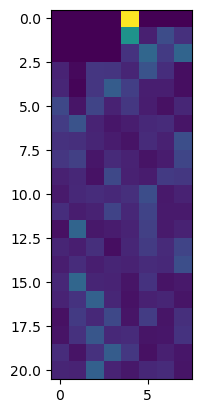

In [17]:
plt.imshow(temps)

In [18]:
measure.average_temp(sys)

0.4666825473805629

In [19]:
measure.extractable_work(.1,sys)

C:\Users\jacks\Documents\GitHub\Qnibble\Notebooks\Presentation\../..\src\density_matrix.py:263: Warning: Requires conversion to and from dense
  warnings.warn("Requires conversion to and from dense", Warning)
C:\Users\jacks\anaconda3\envs\Qnibble\lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:836: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearlySingularWarning)


logm result may be inaccurate, approximate err = 1.0566532449010313e-06


0.5719819402795054